In [1]:
import pandas as pd
import numpy as np
import os
import urllib.parse  # for parsing strings to URI's
from urllib.parse import quote

#RDF libraries
from rdflib import Graph, Literal, RDF, URIRef, Namespace, Dataset, BNode  # basic RDF handling
from rdflib.namespace import FOAF, RDFS, XSD  # most common namespaces
from rdflib.tools.rdf2dot import rdf2dot

#Visualizing
from graphviz import Source

## Function to visualize graph

In [2]:
def visualize_graph(kg):
    # Open a file to write the DOT output
    with open("graph.dot", "w", encoding="utf-8") as dot_file:
        # Generate a DOT file from the RDF graph
        rdf2dot(kg, dot_file)
   
    # Load the DOT file with UTF-8 encoding and render it
    with open("graph.dot", "r", encoding="utf-8") as dot_file:
        src = Source(dot_file.read())
    return src

## Defining Namespaces and Dataset ang a graph called KG

In [3]:
# Namespaces for our vocabulary items (schema information, existing vocabulary, etc.)
ACAD = Namespace('http://acad.io/schema#')
ACADDATA = Namespace('http://acad.io/data#')
VIVO = Namespace('http://vivoweb.org/ontology/core#')
DC = Namespace('http://purl.org/dc/terms/')
OWL = Namespace('http://www.w3.org/2002/07/owl#')


In [4]:
# Initialize a dataset and bind namespaces
dataset = Dataset()
dataset.bind('ACAD', ACAD)
dataset.bind('ACADDATA', ACADDATA)
dataset.bind('VIVO', VIVO)
dataset.bind('DC', DC)
dataset.bind('OWL', OWL)

kg = dataset.graph()

In [5]:
# Load the externally defined schema into the default graph (context) of the dataset
dataset.default_context.parse('vocabulary.ttl', format='turtle')


<Graph identifier=urn:x-rdflib:default (<class 'rdflib.graph.Graph'>)>

## Adding Universities and visualizing
### (namely Concordia and Mcgill)

In [6]:
# Define URIs for Concordia University and McGill University
concordia_uri = ACADDATA['concordia']
mcgill_uri = ACADDATA['mcgill']

# Add triples for Concordia University
kg.add((concordia_uri, RDF.type, ACAD.University))
kg.add((concordia_uri, ACAD.universityName, Literal("Concordia University", datatype=XSD.string)))
kg.add((concordia_uri, ACAD.universityDBpediaLink, URIRef('https://dbpedia.org/page/Concordia_University')))
kg.add((concordia_uri, ACAD.universityWikidataLink, URIRef('https://www.wikidata.org/wiki/Q326342')))

# Add triples for McGill University
kg.add((mcgill_uri, RDF.type, ACAD.University))
kg.add((mcgill_uri, ACAD.universityName, Literal("Mcgill University", datatype=XSD.string)))
kg.add((mcgill_uri, ACAD.universityDBpediaLink, URIRef('https://dbpedia.org/page/McGill_University')))
kg.add((mcgill_uri, ACAD.universityWikidataLink, URIRef('https://www.wikidata.org/wiki/Q201492')))

<Graph identifier=https://rdflib.github.io/.well-known/genid/rdflib/Ncf19c0a3116e42979c7b79f04f36b4a7 (<class 'rdflib.graph.Graph'>)>

In [7]:
kg

<Graph identifier=https://rdflib.github.io/.well-known/genid/rdflib/Ncf19c0a3116e42979c7b79f04f36b4a7 (<class 'rdflib.graph.Graph'>)>


(dot.exe:34140): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:34140): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:34140): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


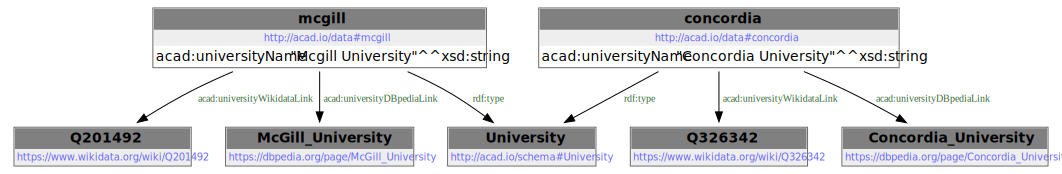

In [8]:
graph = visualize_graph(kg)
graph

## Adding the courses COMP 6481 and COMP 6741

In [9]:
#Adding COMP 6481
pps_course_description = "This course provides an overview of programming, problem solving, widely-used data structures and the design of fundamental and advanced algorithms using object oriented programming. Students will learn about arrays, lists, and the underlying concepts of iterators; sorting and searching algorithms; software testing including boundary and unit testing; complexity analysis; recursion; trees and tree traversal algorithms; maps and hash tables; search trees; and graphs and graph-based algorithms. For a passing grade, the student must pass one or more computer-based Programming Competency Tests."
#Courses/Courses/COMP 6481/Comp6481-Winter-2024_course_outline.pdf
#"file://" + quote("Courses/Courses/COMP 6481/Comp6481-Winter-2024_course_outline.pdf",safe="")
pps_course_outline_uri = "Courses/Courses/COMP6481_PPS/Comp6481-Winter-2024_course_outline.pdf"

kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), RDF.type, VIVO.Course))

#Add that concordia offers this course
kg.add((ACADDATA.concordia, ACAD.offers, URIRef(ACADDATA + 'COMP6481_PPS')))

#Add the name of the course
kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), ACAD.courseName, Literal("Programming and Problem Solving", datatype=XSD.string)))

#Add the Course Subject (COMP/SOEN/COEN etc)
kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), ACAD.courseSubject, Literal("COMP", datatype=XSD.string)))

#Add the Course Number 
kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), ACAD.courseNumber, Literal("6481", datatype=XSD.string)))

#Add the Course Description
kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), ACAD.courseDescription, Literal(pps_course_description, datatype=XSD.string)))

#Add the Course Credits
kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), ACAD.courseCredits, Literal("4", datatype=XSD.string)))

#Add the Course Website
kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), ACAD.courseWebpage, Literal("https://aimanhanna.com/", datatype=XSD.string)))

#Add the Course Outline
if os.path.exists(pps_course_outline_uri):
    # If it does, make outline triple
    kg.add((URIRef(ACADDATA + 'COMP6481_PPS'), ACAD.courseOutline, URIRef("file://" + quote(pps_course_outline_uri,safe=""))))
else:
    print('Could not add Course Outline')


In [10]:
#Adding COMP 6741
is_course_description = "Knowledge representation and reasoning. Uncertainty and conflict resolution. Design of intelligent systems. Grammar-based, rule-based, and blackboard architectures. A project is required."

is_course_outline_uri = "Courses/Courses/COMP6741_IS/course_outline.pdf"

kg.add((URIRef(ACADDATA + 'COMP6741_IS'), RDF.type, VIVO.Course))

#Add that concordia offers this course
kg.add((ACADDATA.concordia, ACAD.offers, URIRef(ACADDATA + 'COMP6741_IS')))

#Add the name of the course
kg.add((URIRef(ACADDATA + 'COMP6741_IS'), ACAD.courseName, Literal("Intelligent Systems", datatype=XSD.string)))

#Add the Course Subject (COMP/SOEN/COEN etc)
kg.add((URIRef(ACADDATA + 'COMP6741_IS'), ACAD.courseSubject, Literal("COMP", datatype=XSD.string)))

#Add the Course Number 
kg.add((URIRef(ACADDATA + 'COMP6741_IS'), ACAD.courseNumber, Literal("6741", datatype=XSD.string)))

#Add the Course Description
kg.add((URIRef(ACADDATA + 'COMP6741_IS'), ACAD.courseDescription, Literal(is_course_description, datatype=XSD.string)))

#Add the Course Credits
kg.add((URIRef(ACADDATA + 'COMP6741_IS'), ACAD.courseCredits, Literal("4", datatype=XSD.string)))

#Add the Course Website
kg.add((URIRef(ACADDATA + 'COMP6741_IS'), ACAD.courseWebpage, Literal("https://www.concordia.ca/academics/graduate/calendar/current/gina-cody-school-of-engineering-and-computer-science-courses/computer-science-and-software-engineering-master-s-and-phd-courses.html", datatype=XSD.string)))

#Add the Course Outline
if os.path.exists(is_course_outline_uri):
    # If it does, make outline triple
    kg.add((URIRef(ACADDATA + 'COMP6741_IS'), ACAD.courseOutline, URIRef("file://" + quote(is_course_outline_uri,safe=""))))
else:
    print('Could not add Course Outline')


## Saving progress

In [11]:
kg.serialize('GraphData.ttl', format='turtle')

<Graph identifier=https://rdflib.github.io/.well-known/genid/rdflib/Ncf19c0a3116e42979c7b79f04f36b4a7 (<class 'rdflib.graph.Graph'>)>


(dot.exe:1504): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:1504): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:1504): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


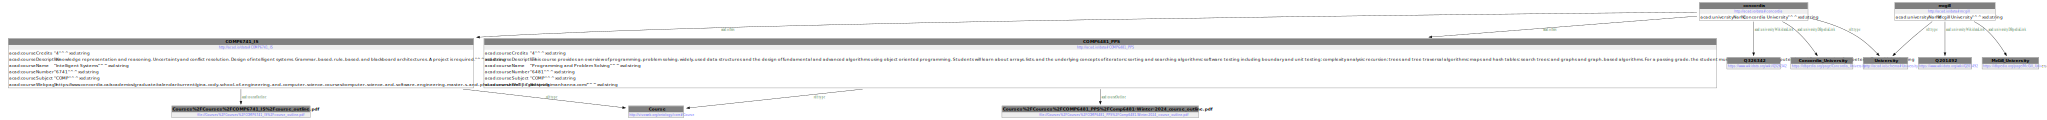

In [12]:
graph = visualize_graph(kg)
graph

## Reading and Processing Concordia Open dataset

In [13]:
df1 = pd.read_csv('CATALOG.csv')
df1 = df1[['Key','Title','Course code','Course number','Description','Website']]
df1.head()

,Key,Title,Course code,Course number,Description,Website
0,FAS_1011,Directed Research,WSDB,496,"Practical, hands-on exercises",NaN
1,FAS_1012,Seminar in Women’s Studies,WSDB,498,"Practical, hands-on exercises",NaN
2,FAS_1013,Introduction to Historical Perspectives in Wom...,WSDB,290,This course provides an introduction to theori...,NaN
3,FAS_1014,Introduction to Contemporary Concerns in Women...,WSDB,291,This course explores a range of current issues...,NaN
4,FAS_1015,Health Issues: Feminist Perspectives,WSDB,391,"This course presents feminist, intersectional,...",NaN


In [14]:
courses = []
for index,row in df1.iterrows():

    if pd.isna(row['Website']):
        row['Website'] = "https://www.concordia.ca/"
    if row.isnull().any():
        continue
    
    courses.append({"courseKey":row['Key'],
                    "courseName":row['Title'],
                    "courseSubject": row['Course code'],
                    "courseNumber": row['Course number'],
                    "courseCredits": 4,
                    "courseDescription": row['Description'],
                    "courseWebpage": row['Website'],
                    "courseOutline": None
                   }
                  )
    
                    
print(courses[:10])

[{'courseKey': 'FAS_1011', 'courseName': 'Directed Research', 'courseSubject': 'WSDB ', 'courseNumber': '496', 'courseCredits': 4, 'courseDescription': 'Practical, hands-on exercises', 'courseWebpage': 'https://www.concordia.ca/', 'courseOutline': None}, {'courseKey': 'FAS_1012', 'courseName': 'Seminar in Women’s Studies', 'courseSubject': 'WSDB ', 'courseNumber': '498', 'courseCredits': 4, 'courseDescription': 'Practical, hands-on exercises', 'courseWebpage': 'https://www.concordia.ca/', 'courseOutline': None}, {'courseKey': 'FAS_1013', 'courseName': 'Introduction to Historical Perspectives in Women’s Studies', 'courseSubject': 'WSDB ', 'courseNumber': '290', 'courseCredits': 4, 'courseDescription': 'This course provides an introduction to theories and writing that affect the lives of women. Through the writing of feminist authors, students examine, from mainly the 20th century, the development of feminist theories and debate.\xa0', 'courseWebpage': 'https://www.concordia.ca/', 'cours

In [15]:
len(courses)

1706

## Adding all courses from the Concordia Open Dataset

In [16]:
for course_item in courses:
    default_course_outline = "https://www.concordia.ca/artsci/math-stats/programs/course-outlines.html"
    kg.add((URIRef(ACADDATA + course_item['courseKey']), RDF.type, VIVO.Course))

    #Add that concordia offers this course
    kg.add((ACADDATA.concordia, ACAD.offers, URIRef(ACADDATA + course_item['courseKey'])))

    #Add the name of the course
    kg.add((URIRef(ACADDATA + course_item['courseKey']), ACAD.courseName, Literal(course_item['courseName'], datatype=XSD.string)))

    #Add the Course Subject (COMP/SOEN/COEN etc)
    kg.add((URIRef(ACADDATA + course_item['courseKey']), ACAD.courseSubject, Literal(course_item['courseSubject'], datatype=XSD.string)))

    #Add the Course Number 
    kg.add((URIRef(ACADDATA + course_item['courseKey']), ACAD.courseNumber, Literal(course_item['courseNumber'], datatype=XSD.string)))

    #Add the Course Description
    kg.add((URIRef(ACADDATA + course_item['courseKey']), ACAD.courseDescription, Literal(course_item['courseDescription'], datatype=XSD.string)))

    #Add the Course Credits
    kg.add((URIRef(ACADDATA + str(course_item['courseKey'])), ACAD.courseCredits, Literal(course_item['courseCredits'], datatype=XSD.string)))

    #Add the Course Website
    kg.add((URIRef(ACADDATA + course_item['courseKey']), ACAD.courseWebpage, Literal(course_item['courseWebpage'], datatype=XSD.string)))

    #Add the Course Outline
    kg.add((URIRef(ACADDATA + course_item['courseKey']), ACAD.courseOutline, Literal(default_course_outline, datatype=XSD.string)))


In [17]:
#Saving progress
kg.serialize('GraphData.ttl', format='turtle')

<Graph identifier=https://rdflib.github.io/.well-known/genid/rdflib/Ncf19c0a3116e42979c7b79f04f36b4a7 (<class 'rdflib.graph.Graph'>)>

## Adding Lectures th the Courses

In [18]:
def print_directory_tree(folder_path, indent=''):
    """
    Print the directory tree of a folder.
    """
    if os.path.isdir(folder_path):
        print(indent + os.path.basename(folder_path) + '/')
        indent += '    '
        for item in sorted(os.listdir(folder_path)):
            print_directory_tree(os.path.join(folder_path, item), indent)
    else:
        print(indent + os.path.basename(folder_path))

print_directory_tree('Courses/Courses/COMP6481_PPS')

COMP6481_PPS/
    Comp6481-Winter-2024_course_outline.pdf
    Lecture_1/
        Other_Material/
            Tutorial_1.pdf
            table.png
        Readings/
            Composition1.java.doc
        Slides/
            Chapter1.pdf
        Worksheets/
            Inherit1.java.doc
        info.txt
    Lecture_2/
        Other_Material/
            Tutorial_2.pdf
            sc.png
        Readings/
            Polymorphism1.java.doc
        Slides/
            Chapter2.pdf
        Worksheets/
            Abstract1.java.doc
        info.txt
    Lecture_3/
        Other_Material/
            Tutorial_3.pdf
        Readings/
            ExceptionHandling1.java.doc
        Slides/
            Chapter3.pdf
        Worksheets/
            ExceptionHandling2.java.doc
        info.txt


In [19]:
def add_lecture(kg, course_uri, lecture_number, lecture_name, lecture_link, slides_path=None, worksheet_path=None, reading_path=None, other_material_path=None):
    # Add lecture information
    lecture_uri = URIRef(str(course_uri) + '_Lecture' + str(lecture_number))
    kg.add((lecture_uri, RDF.type, ACAD.Lecture))
    kg.add((lecture_uri, ACAD.lectureNumber, Literal(lecture_number, datatype=XSD.int)))
    kg.add((lecture_uri, ACAD.lectureName, Literal(lecture_name, datatype=XSD.string)))
    if str(lecture_link) != "None":
        print(lecture_link)
        kg.add((lecture_uri, ACAD.lectureLink, Literal(lecture_link, datatype=XSD.string)))

    # Connect lecture to course
    kg.add((course_uri, ACAD.hasLecture, lecture_uri))

    # Add content for the lecture
    if slides_path:
        slides_uri = URIRef(slides_path)
        kg.add((slides_uri, RDF.type, ACAD.Slides))
        kg.add((lecture_uri, ACAD.hasContent, slides_uri))

    if worksheet_path:
        worksheet_uri = URIRef(worksheet_path)
        kg.add((worksheet_uri, RDF.type, ACAD.Worksheet))
        kg.add((lecture_uri, ACAD.hasContent, worksheet_uri))

    if reading_path:
        reading_uri = URIRef(reading_path)
        kg.add((reading_uri, RDF.type, ACAD.Reading))
        kg.add((lecture_uri, ACAD.hasContent, reading_uri))

    if other_material_path:
        other_material_uri = URIRef(other_material_path)
        kg.add((other_material_uri, RDF.type, ACAD.otherLectureContent))
        kg.add((lecture_uri, ACAD.hasContent, other_material_uri))
        
    print('Added Lecture: ',lecture_uri)


In [20]:
def get_first_file_path(folder_path):
    """
    Get the path of the first file in a folder, or return None if the folder is empty.
    """
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        if len(files) == 0:
            return None
        if files:
            file0 = os.path.abspath(os.path.join(folder_path, files[0]))
            return "file://" + urllib.parse.quote(str(file0))
    return None

def add_course_lectures(kg, course_uri, lectures_path):
    """
    Add lectures of a course to the knowledge graph.
    """
    lecture_number = 1
    for lecture_folder in sorted(os.listdir(lectures_path)):
        lecture_path = os.path.join(lectures_path, lecture_folder)
        if os.path.isdir(lecture_path):
            lecture_name = "Lecture " + str(lecture_number)
            lecture_info_path = os.path.join(lecture_path, "info.txt")
            slides_path = get_first_file_path(os.path.join(lecture_path, "Slides"))
            worksheet_path = get_first_file_path(os.path.join(lecture_path, "Worksheets"))
            readings_path = get_first_file_path(os.path.join(lecture_path, "Readings"))
            other_material_path = get_first_file_path(os.path.join(lecture_path, "Other_Material"))

            lecture_link = None
            if os.path.exists(lecture_info_path):
                with open(lecture_info_path, 'r') as file:
                    info_lines = file.readlines()
                    for line in info_lines:
                        if line.startswith('name'):
                            lecture_name = line.split(',')[1].strip()
                        elif line.startswith('link'):
                            lecture_link = line.split(',')[1].strip()

            # Add lecture to knowledge graph
            print(course_uri, lecture_number, lecture_name, lecture_link,slides_path,worksheet_path,readings_path,other_material_path)
            print("-"*50)
            add_lecture(kg, course_uri, lecture_number, lecture_name, lecture_link,
                        slides_path=slides_path,
                        worksheet_path=worksheet_path,
                        reading_path=readings_path,
                        other_material_path=other_material_path)

            lecture_number += 1


### Adding lectures from COMP6741_IS

In [21]:
add_course_lectures(kg, URIRef(ACADDATA + 'COMP6741_IS'), 'Courses/Courses/COMP6741_IS')

http://acad.io/data#COMP6741_IS 1 introduction https://www.youtube.com/watch?v=aep1v2pZ44Y file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6741_IS%5CLecture_1%5CSlides%5Cweek1.pdf None file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6741_IS%5CLecture_1%5CReadings%5Csyllabus.pdf file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6741_IS%5CLecture_1%5COther_Material%5CProject_Assignment1.pdf
--------------------------------------------------
https://www.youtube.com/watch?v=aep1v2pZ44Y
Added Lecture:  http://acad.io/data#COMP6741_IS_Lecture1
http://acad.io/data#COMP6741_IS 2 knowledge graphs None file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6741_IS%5CLecture_2%5CSlides%5CChapter_2.pdf file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6

### Adding lectures from COMP6481_PPS

In [22]:
add_course_lectures(kg, URIRef(ACADDATA + 'COMP6481_PPS'), 'Courses/Courses/COMP6481_PPS')

http://acad.io/data#COMP6481_PPS 1 intro to pps https://www.youtube.com/watch?v=t9WKOcRB63Q&list=PLJ5C_6qdAvBFzL9su5J-FX8x80BMhkPy1 file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6481_PPS%5CLecture_1%5CSlides%5CChapter1.pdf file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6481_PPS%5CLecture_1%5CWorksheets%5CInherit1.java.doc file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6481_PPS%5CLecture_1%5CReadings%5CComposition1.java.doc file://C%3A%5CUsers%5Cmsais%5CDesktop%5CConcordia%5Cintelligent%20systems%5CCourses%5CCourses%5CCOMP6481_PPS%5CLecture_1%5COther_Material%5Ctable.png
--------------------------------------------------
https://www.youtube.com/watch?v=t9WKOcRB63Q&list=PLJ5C_6qdAvBFzL9su5J-FX8x80BMhkPy1
Added Lecture:  http://acad.io/data#COMP6481_PPS_Lecture1
http://acad.io/data#COMP6481_PPS 2 polymorphism https://www.youtube.co

In [23]:

# # Example usage:
# add_lecture(kg, URIRef(ACADDATA + 'COMP6481_PPS'), 1, "Introduction to Programming", "https://example.com/lecture1",
#             slides_path="file:///path/to/slides1.pdf",
#             worksheet_path="file:///path/to/worksheet1.pdf",
#             reading_path="file:///path/to/reading1.pdf",
#             other_material_path="file:///path/to/other_material1.pdf")

### Saving Progress

In [24]:
#Saving progress
kg.serialize('GraphData.ttl', format='turtle')

<Graph identifier=https://rdflib.github.io/.well-known/genid/rdflib/Ncf19c0a3116e42979c7b79f04f36b4a7 (<class 'rdflib.graph.Graph'>)>

# Adding Topics

In [25]:
def add_topic(kg, topic_name, course_id, lecture_number, topic_link, course_uri):
    """
    Add a topic to the knowledge graph.
    """
    topic_uri = URIRef(topic_name.replace(' ', '_'))

    lecture_uri = URIRef(course_uri + '_' + lecture_number)
    
    # Add triples for the topic
    kg.add((topic_uri, RDF.type, ACAD.Topic))
    kg.add((topic_uri, ACAD.topicName, Literal(topic_name, datatype=XSD.string)))
    kg.add((topic_uri, ACAD.hasTopicLink, Literal(topic_link, datatype=XSD.string)))

    # Connect the topic to a lecture
    kg.add((topic_uri, ACAD.hasProvenanceInformation, lecture_uri))
    
    # Connect the topic to the course
    kg.add((course_uri, ACAD.coversTopic, topic_uri))


### Adding topics from COMP6741

In [26]:
add_topic(kg, "Knowledge Graphs", "COMP6741_IS", "Lecture2", "https://www.wikidata.org/wiki/Q33002955", URIRef(ACADDATA + 'COMP6741_IS'))
add_topic(kg, "Vocabularies & Ontologies", "COMP6741_IS", "Lecture2", "https://www.wikidata.org/wiki/Q324254", URIRef(ACADDATA + 'COMP6741_IS'))
add_topic(kg, "Personalization & Recommender Systems", "COMP6741_IS", "Lecture5", "https://www.wikidata.org/wiki/Q554950", URIRef(ACADDATA + 'COMP6741_IS'))

### Adding topics from COMP6481

In [27]:
add_topic(kg, "Polymorphism", "COMP6481_PPS", "Lecture2", "https://www.wikidata.org/wiki/Q907364", URIRef(ACADDATA + 'COMP6481_PPS'))
add_topic(kg, "Algorithm Analysis", "COMP6481_PPS", "Lecture1", "https://www.wikidata.org/wiki/Q333464", URIRef(ACADDATA + 'COMP6481_PPS'))
add_topic(kg, "Recursion", "COMP6481_PPS", "Lecture3","https://www.wikidata.org/wiki/Q264164", URIRef(ACADDATA + 'COMP6481_PPS'))

In [28]:
#Saving progress
kg.serialize('GraphData.ttl', format='turtle')

<Graph identifier=https://rdflib.github.io/.well-known/genid/rdflib/Ncf19c0a3116e42979c7b79f04f36b4a7 (<class 'rdflib.graph.Graph'>)>

# Adding Student Data

In [29]:
student_df = pd.read_csv('studentdata.csv')
student_df

,ID,Name,Email,Completed Courses,Completed Grade,Semester attempted
0,101,Shrawan Malyala,msaishrawan@gmail.com,COMP6741_IS,A+,241.0
1,101,Shrawan Malyala,msaishrawan@gmail.com,COMP6481_PPS,A,231.0
2,101,Shrawan Malyala,msaishrawan@gmail.com,GCS_294,B+,232.0
3,101,Shrawan Malyala,msaishrawan@gmail.com,GCS_300,C,232.0
4,101,Shrawan Malyala,msaishrawan@gmail.com,GCS_300,A,241.0
5,102,Sraddha Bhattacharjee,bhattacharjeesraddha@gmail.com,COMP6741_IS,A+,241.0
6,102,Sraddha Bhattacharjee,bhattacharjeesraddha@gmail.com,COMP6481_PPS,A+,231.0
7,102,Sraddha Bhattacharjee,bhattacharjeesraddha@gmail.com,GCS_294,A,232.0
8,102,Sraddha Bhattacharjee,bhattacharjeesraddha@gmail.com,GCS_300,B+,232.0
9,106,Abhraham Lincoln,abe.lincoln@concordia.ca,NaN,NaN,NaN


In [30]:
def add_students(kg, students_array, university_uri):
    """
    Add students to the knowledge graph.
    """
    for student_info in students_array:
        student_id, student_name, student_email = student_info

        if university_uri.endswith("concordia"):
            prefix = "concordia_student_"
        elif university_uri.endswith("mcgill"):
            prefix = "mcgill_student_"
        else:
            prefix = "student_"
        # Create student URI
        student_uri = URIRef(ACADDATA + prefix + str(student_id))
        
        # Add triples for the student
        kg.add((student_uri, RDF.type, ACAD.Student))
        kg.add((student_uri, ACAD.studentID, Literal(student_id, datatype=XSD.string)))
        kg.add((student_uri, ACAD.studentName, Literal(student_name, datatype=XSD.string)))
        kg.add((student_uri, ACAD.studentEmail, Literal(student_email, datatype=XSD.string)))
        kg.add((student_uri, ACAD.studiesAt, university_uri))
        print(f"Added {student_id}_{student_name} to the KG sucessfully as {student_uri}")

In [31]:
student_info = student_df[['ID', 'Name', 'Email']].drop_duplicates()

# Converting DataFrame to 2D array
student_array = student_info.values.tolist()

add_students(kg, student_array, concordia_uri)


Added 101_Shrawan Malyala to the KG sucessfully as http://acad.io/data#concordia_student_101
Added 102_Sraddha Bhattacharjee to the KG sucessfully as http://acad.io/data#concordia_student_102
Added 106_Abhraham Lincoln to the KG sucessfully as http://acad.io/data#concordia_student_106
Added 107_Elon Musk to the KG sucessfully as http://acad.io/data#concordia_student_107
Added 108_John Doe to the KG sucessfully as http://acad.io/data#concordia_student_108
Added 109_Tony Stark to the KG sucessfully as http://acad.io/data#concordia_student_109
Added 110_Ussain Bolt to the KG sucessfully as http://acad.io/data#concordia_student_110


### Adding their grades

In [36]:
def add_completed_courses(kg, completed_courses, university_uri):
    """
    Add completed courses information to the knowledge graph.
    """
    for student_id, course, grades in completed_courses:
        # Create student URI
        if university_uri.endswith("concordia"):
            prefix = "concordia_student_"
        elif university_uri.endswith("mcgill"):
            prefix = "mcgill_student_"
        else:
            prefix = "student_"
        # Create student URI
        student_uri = URIRef(ACADDATA + prefix + str(student_id))
        completed_course_uri = URIRef(ACADDATA + 'completed_course_' + str(student_id) + '_' + course)
        # Add triples for completed course
        kg.add((completed_course_uri, RDF.type, ACAD.CompletedCourse))
        kg.add((completed_course_uri, ACAD.hasCourse, URIRef(ACADDATA + course)))

        
        attempt = 1
        for course_info in grades:
            grade_semester_uri = URIRef(ACADDATA + 'completed_course_' + str(student_id) + '_' + course + '_' + 'grade_semester_' + str(attempt))
            course_grade, course_semester = course_info
            kg.add((grade_semester_uri, RDF.type, ACAD.GradeSemesterPair))
            kg.add((grade_semester_uri, ACAD.courseGrade, Literal(course_grade, datatype=XSD.string)))
            kg.add((grade_semester_uri, ACAD.courseSemester, Literal(course_semester, datatype=XSD.string)))

            kg.add((completed_course_uri, ACAD.courseGradeSemester, grade_semester_uri))
            attempt += 1
        
        
        kg.add((student_uri, ACAD.completedCourse, completed_course_uri))
        print(f"Added {student_id} completed {course} to the KG sucessfully as {completed_course_uri}")

In [37]:
grouped = student_df.groupby(['ID', 'Completed Courses'])

In [38]:
students_results = []

for group_keys, group_data in grouped:
    group1 = group_data[['Completed Grade', 'Semester attempted']].values.tolist()
    students_results.append(list(group_keys) + [group1])

for i in students_results:
    print(i)


[101, 'COMP6481_PPS', [['A', 231.0]]]
[101, 'COMP6741_IS', [['A+', 241.0]]]
[101, 'GCS_294', [['B+', 232.0]]]
[101, 'GCS_300', [['C', 232.0], ['A', 241.0]]]
[102, 'COMP6481_PPS', [['A+', 231.0]]]
[102, 'COMP6741_IS', [['A+', 241.0]]]
[102, 'GCS_294', [['A', 232.0]]]
[102, 'GCS_300', [['B+', 232.0]]]


In [39]:
add_completed_courses(kg, students_results, concordia_uri)

Added 101 completed COMP6481_PPS to the KG sucessfully as http://acad.io/data#completed_course_101_COMP6481_PPS
Added 101 completed COMP6741_IS to the KG sucessfully as http://acad.io/data#completed_course_101_COMP6741_IS
Added 101 completed GCS_294 to the KG sucessfully as http://acad.io/data#completed_course_101_GCS_294
Added 101 completed GCS_300 to the KG sucessfully as http://acad.io/data#completed_course_101_GCS_300
Added 102 completed COMP6481_PPS to the KG sucessfully as http://acad.io/data#completed_course_102_COMP6481_PPS
Added 102 completed COMP6741_IS to the KG sucessfully as http://acad.io/data#completed_course_102_COMP6741_IS
Added 102 completed GCS_294 to the KG sucessfully as http://acad.io/data#completed_course_102_GCS_294
Added 102 completed GCS_300 to the KG sucessfully as http://acad.io/data#completed_course_102_GCS_300


In [40]:
students_results[0]

[101, 'COMP6481_PPS', [['A', 231.0]]]

### Saving Progress

In [41]:
#Saving progress
kg.serialize('GraphData.ttl', format='turtle')

<Graph identifier=https://rdflib.github.io/.well-known/genid/rdflib/Ncf19c0a3116e42979c7b79f04f36b4a7 (<class 'rdflib.graph.Graph'>)>

In [42]:
for s,p,o in kg.triples((ACAD.GradeSemesterPair,None,None)):
     print(s,p,o)

In [43]:
g = Graph()
g.parse("GraphData.ttl", format='n3')
from rdflib.plugins.sparql import prepareQuery
# This is an example for the following query: Which [topics] are covered in [course] [lecture]?

# Define the SPARQL query
query = prepareQuery("""
PREFIX vivo: <http://vivoweb.org/ontology/core#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX acad: <http://acad.io/schema#>
SELECT DISTINCT ?course  ?topic ?topicName ?lecture
    WHERE {
  
  	  ?course rdf:type vivo:Course ;
              acad:courseName "Intelligent Systems" ;
  			  acad:hasLecture <http://acad.io/data#COMP6741_IS_Lecture2>.
 
  	  ?topic rdf:type acad:Topic ;
            acad:hasProvenanceInformation <http://acad.io/data#COMP6741_IS_Lecture2> ;
            acad:topicName ?topicName           
}

""")

results = g.query(query)

# Print the results
for row in results:
    print(row.topicName)

In [44]:
for i in results:
    print(i)